# EcomBank Fraud Detection - Task 1: Data Analysis and Preprocessing



This notebook focus on the preprocessing steps for the fraud detection datasets, including handling missing values, cleaning data, performing exploratory data analysis (EDA), feature engineering, and preparing the data for model building.



## Loading Libraries

In [1]:

import sys
import os
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '../scripts')))

In [2]:
from data_preprocessing import *

2024-11-20 05:13:47,700 - INFO - Necessary libraries imported successfully.


# Load the datasets

In [3]:

fraud_data = pd.read_csv('../data/Fraud_Data.csv')
ip_data = pd.read_csv('../data/IpAddress_to_Country.csv')
creditcard_data = pd.read_csv('../data/Creditcard.csv')

In [4]:
# Display the first few rows of each dataset
fraud_data.head(), ip_data.head(), creditcard_data.head()


(   user_id          signup_time        purchase_time  purchase_value  \
 0    22058  2015-02-24 22:55:49  2015-04-18 02:47:11              34   
 1   333320  2015-06-07 20:39:50  2015-06-08 01:38:54              16   
 2     1359  2015-01-01 18:52:44  2015-01-01 18:52:45              15   
 3   150084  2015-04-28 21:13:25  2015-05-04 13:54:50              44   
 4   221365  2015-07-21 07:09:52  2015-09-09 18:40:53              39   
 
        device_id source browser sex  age    ip_address  class  
 0  QVPSPJUOCKZAR    SEO  Chrome   M   39  7.327584e+08      0  
 1  EOGFQPIZPYXFZ    Ads  Chrome   F   53  3.503114e+08      0  
 2  YSSKYOSJHPPLJ    SEO   Opera   M   53  2.621474e+09      1  
 3  ATGTXKYKUDUQN    SEO  Safari   M   41  3.840542e+09      0  
 4  NAUITBZFJKHWW    Ads  Safari   M   45  4.155831e+08      0  ,
    lower_bound_ip_address  upper_bound_ip_address    country
 0              16777216.0                16777471  Australia
 1              16777472.0                167

In [5]:
fraud_data_info = fraud_data.info()
ip_data_info = ip_data.info()
creditcard_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151112 entries, 0 to 151111
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   user_id         151112 non-null  int64  
 1   signup_time     151112 non-null  object 
 2   purchase_time   151112 non-null  object 
 3   purchase_value  151112 non-null  int64  
 4   device_id       151112 non-null  object 
 5   source          151112 non-null  object 
 6   browser         151112 non-null  object 
 7   sex             151112 non-null  object 
 8   age             151112 non-null  int64  
 9   ip_address      151112 non-null  float64
 10  class           151112 non-null  int64  
dtypes: float64(1), int64(4), object(6)
memory usage: 12.7+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138846 entries, 0 to 138845
Data columns (total 3 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   lower

## Handling Missing Values

In [6]:
# Handle missing values
fraud_data, ip_data, creditcard_data = handle_missing_values([fraud_data, ip_data, creditcard_data])

2024-11-20 04:57:57,104 - INFO - Handling missing values for dataframes.
c:\Users\Aman\Documents\GitHub\EcomBank-FraudDetection\scripts\data_preprocessing.py:22: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)
2024-11-20 04:57:57,492 - INFO - Dataframe 1: Missing values before: 0, after: 0
2024-11-20 04:57:57,540 - INFO - Dataframe 2: Missing values before: 0, after: 0
2024-11-20 04:57:57,667 - INFO - Dataframe 3: Missing values before: 0, after: 0


## Data Cleaning

In [7]:
# Clean data
fraud_data = clean_data(fraud_data)

2024-11-20 04:58:03,751 - INFO - Cleaning fraud data.
2024-11-20 04:58:04,764 - INFO - Duplicates removed: 0
2024-11-20 04:58:05,207 - INFO - Datetime columns converted successfully.


## EDA

2024-11-20 04:58:07,903 - INFO - Performing exploratory data analysis (EDA).


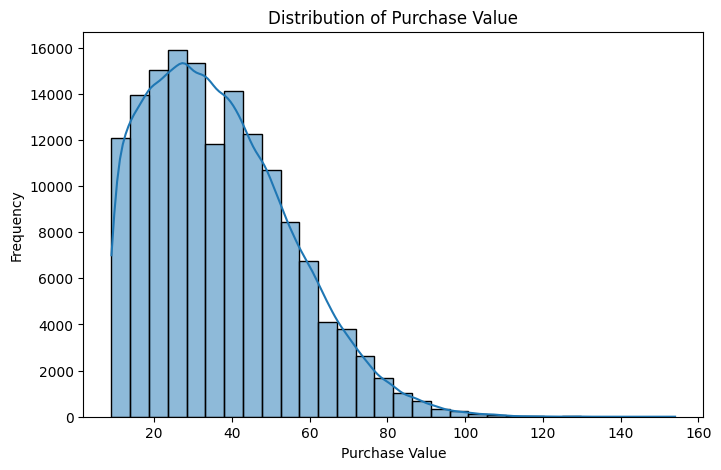

2024-11-20 04:58:10,740 - INFO - Plotted distribution of purchase value.


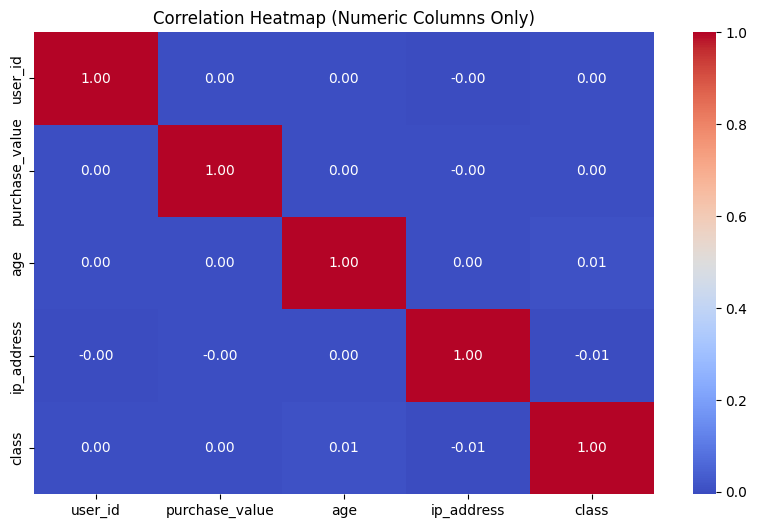

2024-11-20 04:58:11,325 - INFO - Plotted correlation heatmap for numeric columns.
2024-11-20 04:58:11,964 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2024-11-20 04:58:12,513 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


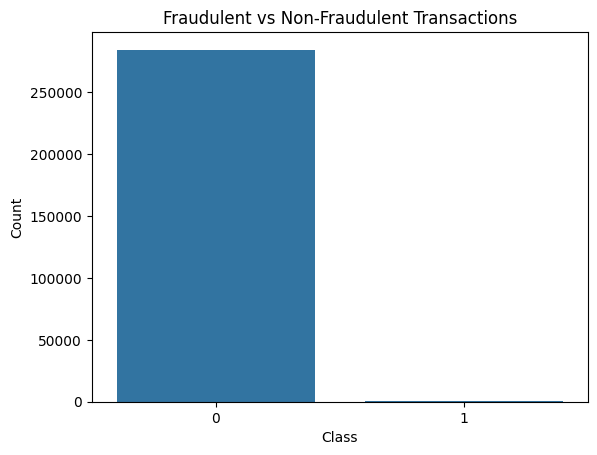

2024-11-20 04:58:12,811 - INFO - Plotted class distribution for credit card data.


In [8]:
# Perform EDA
perform_eda(fraud_data, creditcard_data)

## Merge fraud data with IP data

In [9]:
# Merge fraud data with IP data
fraud_data = merge_fraud_with_ip(fraud_data, ip_data)

2024-11-20 04:58:19,149 - INFO - Merging fraud data with IP data.
2024-11-20 04:58:19,376 - INFO - Fraud data successfully merged with IP data.


## Feature engineering

In [10]:
# Feature engineering
fraud_data = feature_engineering(fraud_data)

2024-11-20 04:58:23,256 - INFO - Performing feature engineering on fraud data.
2024-11-20 04:58:23,442 - INFO - Feature engineering completed successfully.


## Categorical Encoding

In [11]:
# Encode categorical features
fraud_data = encode_features(fraud_data)

2024-11-20 04:58:25,768 - INFO - Encoding categorical features in fraud data.
2024-11-20 04:58:25,847 - INFO - Encoded column: sex
2024-11-20 04:58:25,914 - INFO - Encoded column: source
2024-11-20 04:58:26,005 - INFO - Encoded column: browser
2024-11-20 04:58:26,076 - INFO - Encoded column: country


## Scale features
   

In [12]:
# Scale features
fraud_data, creditcard_data = scale_features(fraud_data, creditcard_data)

2024-11-20 04:58:28,330 - INFO - Scaling numerical features.
2024-11-20 04:58:28,843 - INFO - Scaling completed successfully.


## Prepare datasets

In [13]:
# Prepare datasets
X_fraud, y_fraud, X_creditcard, y_creditcard = prepare_datasets(fraud_data, creditcard_data)

2024-11-20 04:58:31,372 - INFO - Preparing final datasets for model training.
2024-11-20 04:58:31,535 - INFO - Final datasets prepared successfully.


## Display processed data
   

In [14]:
# Display processed data
from IPython.display import display

print("Processed Fraud Data:")
display(fraud_data.head())  

print("\nProcessed Creditcard Data:")
display(creditcard_data.head())  

# Return the datasets
X_fraud, y_fraud, X_creditcard, y_creditcard


Processed Fraud Data:


,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class,ip_address_int,lower_bound_ip_address,upper_bound_ip_address,country,transaction_count,hour_of_day,day_of_week
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,-0.160204,QVPSPJUOCKZAR,2,0,1,39,7.327584e+08,0,732758368,NaN,NaN,4,0.0,2,5
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,-1.142592,EOGFQPIZPYXFZ,0,0,0,53,3.503114e+08,0,350311387,NaN,NaN,4,0.0,1,0
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,-1.197169,YSSKYOSJHPPLJ,2,3,1,53,2.621474e+09,1,2621473820,NaN,NaN,4,0.0,18,3
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,0.385567,ATGTXKYKUDUQN,2,4,1,41,3.840542e+09,0,3840542443,NaN,NaN,4,0.0,13,0
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,0.112681,NAUITBZFJKHWW,0,4,1,45,4.155831e+08,0,415583117,NaN,NaN,4,0.0,18,2



Processed Creditcard Data:


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-0.694242,-0.044075,1.672773,0.973366,-0.245117,0.347068,0.193679,0.082637,0.331128,...,-0.024923,0.382854,-0.176911,0.110507,0.246585,-0.392170,0.330892,-0.063781,0.244964,0
1,0.0,0.608496,0.161176,0.109797,0.316523,0.043483,-0.061820,-0.063700,0.071253,-0.232494,...,-0.307377,-0.880077,0.162201,-0.561131,0.320694,0.261069,-0.022256,0.044608,-0.342475,0
2,1.0,-0.693500,-0.811578,1.169468,0.268231,-0.364572,1.351454,0.639776,0.207373,-1.378675,...,0.337632,1.063358,1.456320,-1.138092,-0.628537,-0.288447,-0.137137,-0.181021,1.160686,0
3,1.0,-0.493325,-0.112169,1.182516,-0.609727,-0.007469,0.936150,0.192071,0.316018,-1.262503,...,-0.147443,0.007267,-0.304777,-1.941027,1.241904,-0.460217,0.155396,0.186189,0.140534,0
4,2.0,-0.591330,0.531541,1.021412,0.284655,-0.295015,0.071999,0.479302,-0.226510,0.744326,...,-0.012839,1.100011,-0.220123,0.233250,-0.395202,1.041611,0.543620,0.651816,-0.073403,0


(        purchase_value      device_id  source  browser  sex  age  country  \
 0            -0.160204  QVPSPJUOCKZAR       2        0    1   39        4   
 1            -1.142592  EOGFQPIZPYXFZ       0        0    0   53        4   
 2            -1.197169  YSSKYOSJHPPLJ       2        3    1   53        4   
 3             0.385567  ATGTXKYKUDUQN       2        4    1   41        4   
 4             0.112681  NAUITBZFJKHWW       0        4    1   45        4   
 ...                ...            ...     ...      ...  ...  ...      ...   
 151107        0.330990  XPSKTWGPWINLR       2        0    1   28        4   
 151108       -0.105627  LYSFABUCPCGBA       2        4    1   32        4   
 151109        0.167258  MEQHCSJUBRBFE       2        2    0   26        4   
 151110        0.494721  CMCXFGRHYSTVJ       2        0    1   37        4   
 151111       -0.924284  ZINIADFCLHYPG       1        2    1   38        4   
 
         transaction_count  hour_of_day  day_of_week  
 0     

In [15]:
# Save features and targets separately
X_fraud.to_csv("../data/X_fraud.csv", index=False)
y_fraud.to_csv("../data/y_fraud.csv", index=False)
X_creditcard.to_csv("../data/X_creditcard.csv", index=False)
y_creditcard.to_csv("../data/y_creditcard.csv", index=False)

print("Features and targets saved separately as CSV files.")


Features and targets saved separately as CSV files.
